# Data Visualization with Matplotlib and Seaborn

Agenda: 
- Explain what types of graphs best convey specific relationships
- Use the subplots syntax to create a graph
    - Line
    - Bar
    - Scatter
    - Hist
- Customize different aspects of a graph
    - labels (title, axis)
    - Linestyle 
    - Colors
- Create multiple graphs in one figure


# Activation Exercise

Take 3 minutes in groups of 3 to think about what types of plots would be best to visualize the scenarios below.  
Peruse some plot examples here for ideas:
[Python Graphing Gallery](https://python-graph-gallery.com) or [Data Viz Project](https://datavizproject.com/)


### Scenario 1: You would like to display counts of coffee shops in each Chicago zipcode?

In [3]:
 # what are some appropriate plots?

### Scenario 2: You would like to visualize the correllation between miles per gallon of a car and horsepower

In [4]:
# what are some appropriate plots?

### Scenario 3: You would like to visualize the distribution of blood pressure readings of American males between 25 and 35

In [5]:
# what are some appropriate plots?

## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [6]:
# One of several libraries you will get real used to importing. 
# https://matplotlib.org/3.1.1/index.html
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# Two well worn data sets
from sklearn.datasets import load_iris, load_wine
import pandas as pd

data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](iris_virginica.jpg)

### Dataframe vs Graph: Which do you prefer?

In [7]:
# I like to use sample rather than head because it gives me a better idea of the distribution of observations
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
20,5.4,3.4,1.7,0.2,0
72,6.3,2.5,4.9,1.5,1
38,4.4,3.0,1.3,0.2,0
129,7.2,3.0,5.8,1.6,2
54,6.5,2.8,4.6,1.5,1


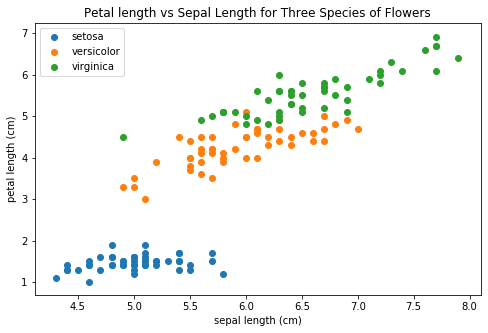

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

In [9]:
# your thoughts here

In your presentation decks, you will no doubt be tempted to print out the head of a data frame, take a screen shot, and plop it in the middle of a slide.  We all have that instinct; the dataframe object will become one your most cherished objects. If you put them in your deck, you will no doubt hear one of us gently request its replacement with some other figure.

## The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information such more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 

## What Makes an Effective Visualization?

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
        - Red and Down tends to be negative while Green and Up is positive
        - Lighter hues are seen as lower values and darker is higher values
        - Axis start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="data/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="data/usa-today-2.png">

# Matplotlib

<img src="data/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

# Common Charts and Their Uses

# Scatter Plots

Scatter plots are also very common.  They allow one to visualize the relationship of two variables. 

In the plots below, we see different correlations between variables:



In [10]:
import sys
from src.data_import import player_salaries

In [11]:
# Allows us to see all of the columns in a dataframe
pd.set_option('display.max_columns',None)

Text(0.5, 1.0, '')

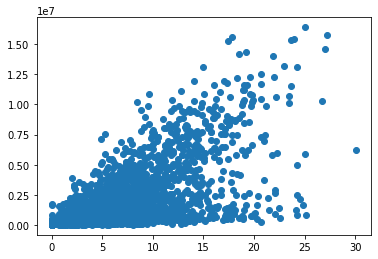

In [12]:
# Is there a correlation between career points per game average career salary?
import numpy as np
pts_v_salary = player_salaries.groupby('_id').aggregate(np.mean)[['career_PTS', 'salary']]
avg_pts = pts_v_salary['career_PTS']
avg_salary = pts_v_salary['salary']

plt.scatter(avg_pts, avg_salary)

# label the plot below with an appropriate title describing the correlation you see
plt.title('')

As we move into modeling, we will begin talking about the relationship of a target variable and a feature.  If we are predicting salary using a linear model, seeing strong positive correlation suggests that Points Per Game may be an important feature to include in our model.

In [18]:
# We can even put f-strings in titles: 
pts_v_salary.corr().iloc[0,1]

0.6416397500759979

In [19]:
# In pairs, explore the data and visualize a negative correlation

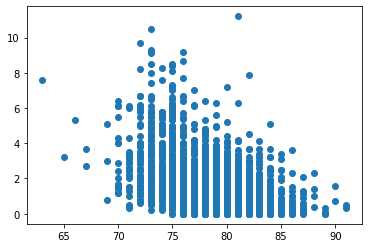

In [20]:
# Is there a correlation between height and career assits % 
individual_players = player_salaries.drop_duplicates('_id')

height = individual_players['height_inches']
career_assts = individual_players['career_AST']

plt.scatter(height, career_assts);

# The graph above is missing a title and labels.  
Let's work together to add labels using the methods reference in the link below.  
Reference [this link](https://python-graph-gallery.com/4-add-title-and-axis-label/)

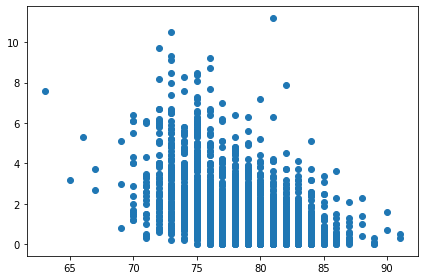

In [17]:
plt.scatter(height, career_assts);
x_label = 'Height (in)'
y_label = 'Career Assists/Game'
title = 'Assists/Game Over a Player\'s Career\nis Negatively Correlated to Height '

plt.tight_layout()

We can also change [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), opacity, marker size, and [marker symbol](https://matplotlib.org/3.2.1/api/markers_api.html).  
Below, we have a list of parameters with incorrect values.  Place the values into the correct parameters to create a scatter plot of the correlation between "rooms" and "% lower status of the population" with large blue triangles.

# Group Discussion:
Have a conversation with your partners and decide how to rearrange the variables into the correct pattern

In [22]:
player_salaries.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,height_inches,league,player_id,salary,season,season_end,season_start,team
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,82,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,82,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,82,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,82,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,82,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [21]:
a = height
b = 100
c = .2 
d = 'green'
e = 'pink' 
f = '^'
g = career_assts
h = individual_players['salary']/20000

plt.scatter(x= , y=, alpha=, c=, marker=, s=)

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

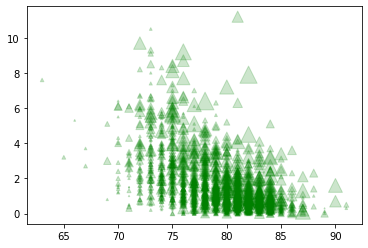

In [52]:
#__SOLUTION__

a = height
b = 100
c = .2 
d = 'green'
e = 'pink' 
f = '^'
g = career_assts
h = individual_players['salary']/20000

plt.scatter(x=a , y=g, alpha=c, c=d, marker=f, s=h)


## Line Plot

Tracks the change of a single variable over time.  They are generally better than bar graphs over shorter periods of time.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

shampoo = pd.read_csv('data/sales-of-shampoo-over-a-three-ye.csv')[:-1]

shampoo.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


Text(0, 0.5, 'Total Sales')

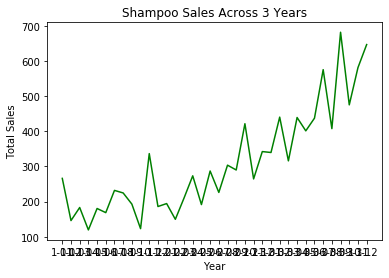

In [54]:
plt.plot(shampoo.Month, shampoo.iloc[:,1], color='g')
plt.title('Shampoo Sales Across 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')

## The xticks are illegible in the plot above.



One way to combat that is to try rotating the ticks.  
Use [this documentation](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) to learn how to rotate.

While you're at it, change the [linestyle](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).

Text(0, 0.5, 'Total Sales')

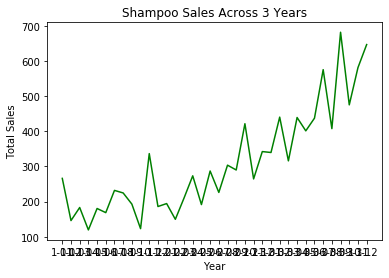

In [55]:
# Update the code below to rotate the xticks
plt.plot(shampoo.Month, shampoo.iloc[:,1], color='g')
plt.title('Shampoo Sales Across 3 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')


# Pair Programming # 1
Now, in groups of 2, take 3 minutes to see if you can do better. Look into the xticks documentation further. Try to reduce the number of ticks to increase visability

This can be tricky.  Don't get discouraged if you can't get it.

In [56]:
# Your code here

## Bar charts

Bar charts are everywhere: powerpoints, billboards and the evening news. They are used to show the relationship of a numerical and a categorical variable.

For example, a bar chart can show the growth of a single categorical variable across time.



In [57]:
# Year and months are in an odd format in this shampoo dataset.  
# Use custom functions to extract data

def get_year(date):
    return date[0]

shampoo['year'] = shampoo['Month'].apply(get_year)
total_sales_per_year = shampoo.groupby('year').sum()[:-1]

def get_month(date):
    return date[2:]

shampoo['month'] = shampoo['Month'].apply(get_month)
total_sales_per_month = shampoo.groupby('month').sum().sort_values(by='month')
months = ['January', 'February', 'March', 'April', 
         'May', 'June', 'July', 'August', 'September', 
         'October', 'November', 'December']
total_sales_per_month

,Sales of shampoo over a three year period
month,
01,800.0
02,735.8
03,709.1
04,831.9
05,773.0
06,892.9
07,1033.3
08,935.7
09,1164.7


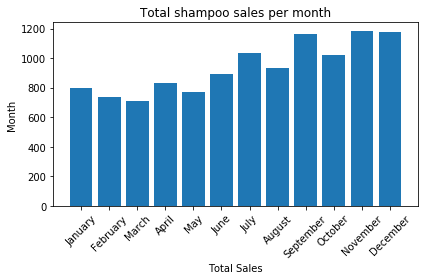

In [58]:
plt.bar(x = list(total_sales_per_month.index), height=total_sales_per_month.values.flatten())
plt.xticks(ticks = range(0,12), labels=months)
plt.xticks(rotation=45)
plt.title('Total shampoo sales per month')
plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.tight_layout()

The plot about is small. Adjust the figure size to make it bigger.
Look at [this link](https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib)

In [59]:
# Your code here

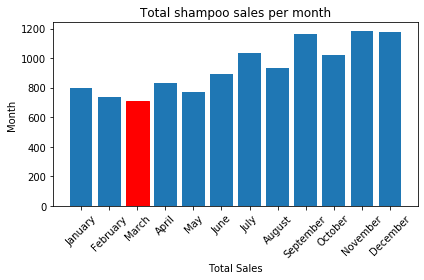

In [60]:
# With barplots, we can also interact with indiividual rectangles.

rectangles = plt.bar(x = list(total_sales_per_month.index), height=total_sales_per_month.values.flatten())
plt.xticks(ticks = range(0,12), labels=months)
plt.xticks(rotation=45)
plt.title('Total shampoo sales per month')
plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.tight_layout()
rectangles[2].set_color('r')

## Histograms

We will get get further into histograms in mod 2, but it is good to get familiar with them sooner rather than later. 

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.  

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.



![histogram_ex](images/histogram_example.svg)

In [53]:
divy_bikes_url = 'https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2020_Q1.zip'

In [61]:
! curl https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2020_Q1.zip -o 'data/divy_2020_Q1.zip'
! unzip data/divy_2020_Q1.zip -d data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15.1M  100 15.1M    0     0  2806k      0  0:00:05  0:00:05 --:--:-- 2702k
Archive:  data/divy_2020_Q1.zip
  inflating: data/Divvy_Trips_2020_Q1.csv  
   creating: data/__MACOSX/
  inflating: data/__MACOSX/._Divvy_Trips_2020_Q1.csv  


In [107]:
from src.data_import import prep_divy
divy_trips = prep_divy()

In [109]:
divy_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,hour
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member,2,20
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member,4,14
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member,4,19
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member,1,16
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member,4,8


Can we see a visual difference between in hourly ride count distributions between weekdays and weekends?


In [110]:
# Plot weekdays

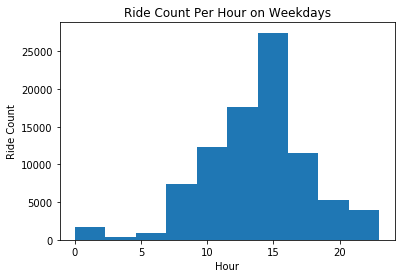

In [111]:
weekday_divy = divy_trips[(divy_trips.weekday == 6) |(divy_trips.weekday == 7)]
plt.hist(weekday_divy['hour'])
plt.xlabel('Hour')
plt.ylabel('Ride Count')
plt.title('Ride Count Per Hour on Weekdays');

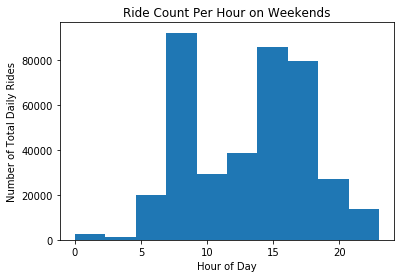

In [112]:
# Plot Weekends
weekend_divy = divy_trips[~(divy_trips.weekday == 6) |(divy_trips.weekday == 7)]

plt.hist(weekend_divy['hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Total Daily Rides')
plt.title('Ride Count Per Hour on Weekends');

## Layering

![cake](https://media.giphy.com/media/XMgCFjsCSARxK/giphy.gif)

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other. 

/Users/johnmaxbarry/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/Users/johnmaxbarry/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


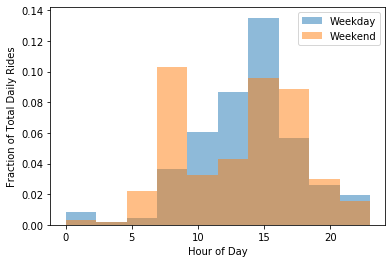

In [113]:
plt.hist(weekday_divy['hour'], alpha=.5, normed=True, label='Weekday')
plt.hist(weekend_divy['hour'], alpha=.5, normed=True, label='Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Fraction of Total Daily Rides')
plt.legend();

## Box Plots

Box plots (or box-and-whisker plots), like histograms, show the distribution of a continous variable.  They have a median line, where half the data falls above, half below.  The box represents the interquartile range, and the whiskers encompass (most often) 95% of the data. We can detect skew from a boxplot, and it is also a quick way to see detect outliers.

Again, we will get further into boxplots in mod 2.

![boxplot](images/boxplot.png)

In [121]:
from sklearn.datasets import load_boston

data = load_boston()

# Median value of Boston homes (1978) in 1000's
house_prices = data.target
house_prices[:5]


array([24. , 21.6, 34.7, 33.4, 36.2])

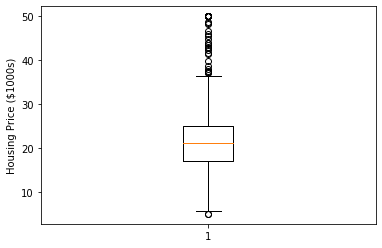

In [123]:
plt.boxplot(house_prices)
plt.ylabel("Housing Price ($1000s)");

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - This is useful for extensibility 
    - Gives you access to the figure and individual axis in a plot
    - More fine grained control of customizing your plot
    - Easily create additional axis on your figure
    - This syntax is a good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specific
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

We will now walk through some common charts and their uses, while practicing our matplotlib syntax

# Pair Programming 2:

We want to display the boxplot and the histogram of the boston housing sales prices side by side.  
To do so, we will us the plt.subplots() convention.  

The cell below is missing the appropriate ax and fig variables, so it will not run.  

In groups of two, take 3 minutes to add in the appropriate variables to make the cell function.

ValueError: too many values to unpack (expected 0)

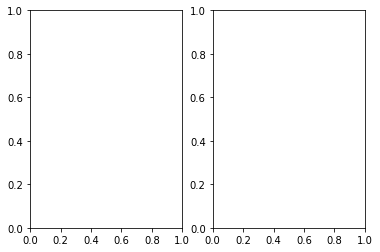

In [62]:

fig, () = plt.subplots(1,2)
set_figheight(7)
set_figwidth(10)

boxplot(sales_price)
set_xlabel('House Price ($1000s)');
set_ylabel('Count')
set_title('Many Outliers in Boston House Prices')

hist(sales_price)
set_ylabel('Count')
set_title('Distribution of Boston House Prices')

plt.tight_layout()
;

## Pie Charts
Love em or hate em, you'll no doubt see em.
One spend much time on them, but know you can use matplotlib to plot them.
They show relative sizes of subgroups of our data.

In [ ]:
fig, ax = plt.subplots()
ax.pie(df_iris['target'].value_counts(), labels = list(data['target_names']), autopct='%1.0f%%');

ax.set_title('Target Distribution of Iris Dataset')
plt.tight_layout()


In [ ]:
fig, ax = plt.subplots()
for group in shampoo.groupby('year').groups:
    x = shampoo.groupby('year').get_group(group)
    ax.plot(x.month, x.iloc[:,1], )
    
ax.set_title('Lineplot of Shampoo Sales\n Over Three Years')
ax.legend(['year_1', 'year_2', 'year_3'])
ax.set_xlabel('Month')
ax.set_ylabel('Shampoo Sales')

### Quick note: style sheets are cool

Find another style from the Docs and set the style. Once you've set the style try rerunning older graphs:

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
style = 'fivethirtyeight'
plt.style.use(style)

## Saving your figures

Let's split the shampoo sales into years, and plot three line plots, one on top of the other

In [ ]:
fig, ax = plt.subplots()
for group in shampoo.groupby('year').groups:
    x = shampoo.groupby('year').get_group(group)
    ax.plot(x.month, x.iloc[:,1], )
    
ax.legend(['year_1', 'year_2', 'year_3'])
ax.set_xlabel('Month')
ax.set_ylabel('Shampoo Sales')

# plt.savefig('path_to_figure_folder/.svg')

# Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [ ]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y);

## Adding Text

In [ ]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.text(s='random comment', x=0, y=3)
ax.annotate(s='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

## Scatter Plot

In [ ]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can still use the subplots syntax by passing our
# axis object into the graphing function

sns.scatterplot(x, y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

## Violin Plot

In [ ]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.violinplot(data=tips, x="day", y="total_bill");

## Kernel Density Estimation Plot

In [ ]:
sample = stats.norm.rvs(size=200)

sns.kdeplot(sample);

In [ ]:
sns.kdeplot(sample, bw=0.1);

In [ ]:
sns.kdeplot(sample, bw=0.01, kernel='epa');

In [ ]:
sns.distplot(sample);

Use another seaborn ploting method to explore the dataset!

In [ ]:
# Your code here



## Seaborn Datasets

In [ ]:
sns.get_dataset_names()

In [ ]:
ans = sns.load_dataset('anscombe')
ans.head()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ans['x'], ans['y'], c=ans['dataset'].map({'I': 1,
                                                     'II': 2,
                                                     'III': 3,
                                                     'IV': 4}));